In [2]:
import pandas as pd
import numpy as np
import os, re, sys, csv
from collections import defaultdict
from tqdm import tqdm

In [3]:
import pickle as pkl

In [26]:
with open('./data/para-nmt-0.5m-processed.txt', 'r') as f:
    lines = f.readlines()
lines = [x.strip() for x in lines]

In [27]:
len(lines)

500000

In [6]:
lines[:5]

['wine ! look , i know how this sounds .\ti know how it sounds .',
 "do n't you care ? ''\tdo you care ? ``",
 "why 'd you light the fuse , man ?\twhy did you light the cigar , man ?",
 'maybe a balloon might have lifted a man up there .\tmaybe there could be a balloon out there .',
 "you fitted up this defendant because you do n't like him .\tyou threw this defendant very well 'cause you did n't like him ."]

In [28]:
lines[0]

'wine ! look , i know how this sounds .\ti know how it sounds .'

In [6]:
lines = [x.split("\t") for x in lines]

In [7]:
lines[:5]

[['wine ! look , i know how this sounds .', 'i know how it sounds .'],
 ["do n't you care ? ''", 'do you care ? ``'],
 ["why 'd you light the fuse , man ?", 'why did you light the cigar , man ?'],
 ['maybe a balloon might have lifted a man up there .',
  'maybe there could be a balloon out there .'],
 ["you fitted up this defendant because you do n't like him .",
  "you threw this defendant very well 'cause you did n't like him ."]]

In [ ]:
#bible in this format

# All pairs 

In [14]:
read_f = open('../data/bible/paraphrase/train_x.txt', 'r') 
        

In [15]:
test = next(read_f)

In [16]:
test

"['Then answered David and said to Ahimelech the Hittite, and to Abishai the son of Zeruiah, brother to Joab, saying, Who will go down with me to Saul to the camp? And Abishai said, I will go down with thee.', 'David spoke to Achimelech the Hethite, and Abisai the son of Sarvia the brother of Joab, saying: Who will go down with me to Saul into the camp? And Abisai said: I will go with thee.']\n"

In [17]:
eval(test.strip())

['Then answered David and said to Ahimelech the Hittite, and to Abishai the son of Zeruiah, brother to Joab, saying, Who will go down with me to Saul to the camp? And Abishai said, I will go down with thee.',
 'David spoke to Achimelech the Hethite, and Abisai the son of Sarvia the brother of Joab, saying: Who will go down with me to Saul into the camp? And Abisai said: I will go with thee.']

In [18]:
read_f.close()

In [19]:
write_file = open('./data/bible_pairs.txt', 'w')

with open('../data/bible/paraphrase/train_x.txt', 'r') as f:
    for line in f:
        line = eval(line.strip())
        
        assert len(line) == 2
        
        print(line[0], line[1], sep='\t', file=write_file)
        

In [20]:
with open('../data/bible/paraphrase/valid_x.txt', 'r') as f:
    for line in f:
        line = eval(line.strip())
        
        assert len(line) == 2
        
        print(line[0], line[1], sep='\t', file=write_file)

In [21]:
write_file.close()

In [22]:
count = 0

with open('./data/bible_pairs.txt', 'r') as f:
    for line in f:
        count += 1

In [23]:
count

740084

In [24]:
read_f = open('./data/bible_pairs.txt', 'r')

In [25]:
next(read_f)

'Then answered David and said to Ahimelech the Hittite, and to Abishai the son of Zeruiah, brother to Joab, saying, Who will go down with me to Saul to the camp? And Abishai said, I will go down with thee.\tDavid spoke to Achimelech the Hethite, and Abisai the son of Sarvia the brother of Joab, saying: Who will go down with me to Saul into the camp? And Abisai said: I will go with thee.\n'

In [32]:
bad_lines = []
good_lines = []
with open('./data/bible_pairs.txt', 'r') as f:
    for line in f:
        line= line.strip()
        lines = line.split("\t")
        if len(lines) != 2:
            bad_lines.append(line)
        else:
            good_lines.append(line)

In [33]:
len(bad_lines), len(good_lines)

(5025, 735059)

In [31]:
bad_lines[:4]

['though the wicked spring up as the grass, and all the evildoers flourish, they will be destroyed forever.',
 '[]',
 'The grace of the Lord Jesus Christ, and the love of God, and the communion of the Holy Ghost, be with you all. Amen.',
 'Then you will delight in righteous sacrifices, burnt offering and whole burnt offering. Then bulls will be offered on your altar.']

In [34]:
good_lines[0]

'Then answered David and said to Ahimelech the Hittite, and to Abishai the son of Zeruiah, brother to Joab, saying, Who will go down with me to Saul to the camp? And Abishai said, I will go down with thee.\tDavid spoke to Achimelech the Hethite, and Abisai the son of Sarvia the brother of Joab, saying: Who will go down with me to Saul into the camp? And Abisai said: I will go with thee.'

In [35]:
with open('./data/bible_pairs.txt', 'w') as f:
    for line in good_lines:
        print(line, file=f)

In [36]:
import torch 

In [42]:
x = torch.zeros([20, 55])

In [43]:
x_ = x.unsqueeze(-1)

In [44]:
x_.shape

torch.Size([20, 55, 1])

In [45]:
y = torch.zeros([20, 55, 32])

In [46]:
x_.expand_as(y)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [10]:
bible_df = pkl.load(open('../semantics_final/Data/aligned_dataframe.pkl','rb'))

In [11]:
bible_df.columns

Index(['KJV', 'ASV', 'BBE', 'DARBY', 'DRA', 'LEB', 'WEB', 'YLT'], dtype='object')

In [12]:
#ASV vs LEB
asv = list(bible_df['ASV'])
leb = list(bible_df['LEB'])

In [13]:
len(asv), len(leb)

(31096, 31096)

In [14]:
pairs = [(asv[i], leb[i]) for i in range(len(asv))]

In [15]:
len(pairs)

31096

In [24]:
pairs[0]

('1 Be not thou envious against evil men; Neither desire to be with them:',
 '1 Do not envy men of evil, and do not desire to be with them.')

In [25]:
processed = []
for p in pairs:
    l1 = " ".join(p[0].split(" ")[1:])
    l2 = " ".join(p[1].split(" ")[1:])
    processed.append((l1, l2))

In [26]:
len(processed)

31096

In [27]:
processed[0]

('Be not thou envious against evil men; Neither desire to be with them:',
 'Do not envy men of evil, and do not desire to be with them.')

In [28]:
#split
train, validate, test = np.split(processed, [int(.7*len(processed)), int(.8*len(processed))])

In [29]:
type(train), type(validate), type(test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [30]:
len(train), len(validate), len(test)

(21767, 3109, 6220)

In [31]:
train[0]

array(['Be not thou envious against evil men; Neither desire to be with them:',
       'Do not envy men of evil, and do not desire to be with them.'],
      dtype='<U526')

In [32]:
train[0][0]

'Be not thou envious against evil men; Neither desire to be with them:'

In [33]:
with open('./bible_train.txt', 'w') as f:
    for l in train:
        #l1 = " ".joinl[0].split(" ")
        print(l[0], l[1], sep='\t', file=f)

In [36]:
with open('./bible_dev.txt', 'w') as f:
    for l in validate:
        print(l[0], l[1], sep='\t', file=f)

In [37]:
with open('./bible_test.txt', 'w') as f:
    for l in test:
        print(l[0], l[1], sep='\t', file=f)

In [3]:
#eval file format?
eval_data = pkl.load(open('sts_data.pkl', 'rb'))

In [4]:
type(eval_data)

dict

In [5]:
len(eval_data)

7

In [6]:
eval_data.keys()

dict_keys(['2012', '2015', '2014', '2016', '2017', '2013', 'STSBenchmark'])

In [7]:
#keep eval data same for now. 

In [ ]:
 #--vocab_file para-nmt-0.5m-vocab \

In [38]:
with open('bible_train.txt', 'r') as f:
    lines = f.readlines()
lines = [x.strip() for x in lines]

In [39]:
lines[0]

'Be not thou envious against evil men; Neither desire to be with them:\tDo not envy men of evil, and do not desire to be with them.'

In [44]:
def load_sent(path):
        data_pair1 = []
        data_pair2 = []
        with open(path) as f:
            for line in f:
                line = line.strip().lower()
                if len(line):
                    #print(line)
                    line = line.split('\t')
                    if len(line) == 2:
                        data_pair1.append(line[0].split(" "))
                        data_pair2.append(line[1].split(" "))
                    else:
                        print(line)
        assert len(data_pair1) == len(data_pair2)
        return data_pair1, data_pair2

In [46]:
 data_pair1, data_pair2 = load_sent('bible_train.txt')

['and when he had thus spoken, he dismissed the assembly.']
['the grace of the lord jesus christ, and the love of god, and the communion of the holy spirit, be with you all.']
['the grace of our lord jesus christ be with all of you. amen.']
['now to him that is able to establish you according to my gospel and the preaching of jesus christ, according to the revelation of the mystery which hath been kept in silence through times eternal,']
['but now is manifested, and by the scriptures of the prophets, according to the commandment of the eternal god, is made known unto all the nations unto obedience of faith:']
['to the only wise god, through jesus christ, to whom be the glory for ever. amen.']


In [47]:
len(data_pair1), len(data_pair2)

(21747, 21747)

In [48]:
#model vgvae models.py
#try extracting vectors 

In [50]:
#! python get_vectors.py -s best.ckpt -v para-nmt-0.5m-vocab/vocab_50000

04-27 14:17 INFO: vocab loaded from: para-nmt-0.5m-vocab/vocab_50000
04-27 14:17 INFO: model loaded!
04-27 14:17 INFO: vgvae(
  (yencode): word_avg(
    (embed): Embedding(50003, 50)
  )
  (zencode): word_avg(
    (embed): Embedding(50003, 50)
  )
  (mean1): Linear(in_features=50, out_features=50, bias=True)
  (logvar1): Linear(in_features=50, out_features=1, bias=True)
  (mean2): Linear(in_features=50, out_features=50, bias=True)
  (logvar2): Linear(in_features=50, out_features=50, bias=True)
  (decode): bag_of_words(
    (hid2vocab): Sequential(
      (0): Linear(in_features=100, out_features=100, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.0, inplace=False)
      (3): Linear(in_features=100, out_features=100, bias=True)
      (4): ReLU()
      (5): Dropout(p=0.0, inplace=False)
      (6): Linear(in_features=100, out_features=100, bias=True)
      (7): ReLU()
      (8): Dropout(p=0.0, inplace=False)
      (9): Linear(in_features=100, out_features=50003, bias=True)
    )
  )
 

# Disentangled vectors

In [51]:
y_vecs1 = pkl.load(open('y_vecs_1.pkl', 'rb'))
y_vecs2 = pkl.load(open('y_vecs_2.pkl', 'rb'))
z_vecs1 = pkl.load(open('z_vecs_1.pkl', 'rb'))
z_vecs2 = pkl.load(open('z_vecs_2.pkl', 'rb'))

In [52]:
print(type(y_vecs1))

<class 'numpy.ndarray'>


In [53]:
y_vecs1.shape, y_vecs2.shape, z_vecs1.shape, z_vecs2.shape

((21747, 50), (21747, 50), (21747, 50), (21747, 50))

In [54]:
#plot z
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt

In [55]:
pca = PCA(n_components=2)
pca_vec1 = pca.fit_transform(z_vecs1)
pca_vec2 = pca.transform(z_vecs2)

In [56]:
pca_vec1.shape, pca_vec2.shape

((21747, 2), (21747, 2))

In [57]:
pca.explained_variance_ratio_

array([0.27539957, 0.17638212], dtype=float32)

In [58]:
import seaborn as sns

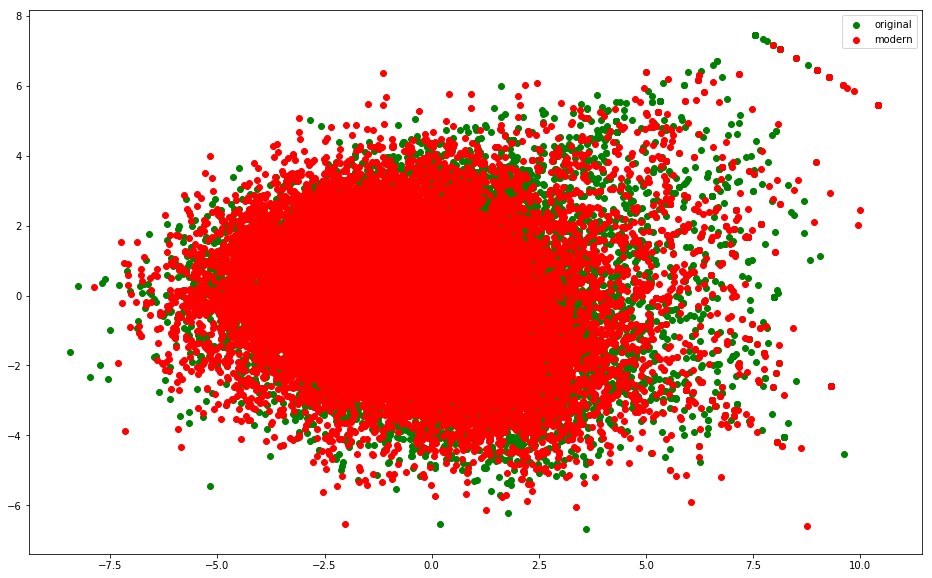

In [79]:
plt.figure(figsize=(16,10))
plt.scatter(pca_vec1[:,0], pca_vec1[:,1], c='green', label='original')
plt.scatter(pca_vec2[:,0], pca_vec2[:,1], c='red', label='modern')
plt.legend()
plt.show()

In [61]:
#cosine similarities between ys
def cosine_similarity(v1, v2):
    prod = (v1 * v2).sum(-1)
    v1_norm = (v1 ** 2).sum(-1) ** 0.5
    v2_norm = (v2 ** 2).sum(-1) ** 0.5
    return prod / (v1_norm * v2_norm)

In [71]:
sims = []
for i in range(len(y_vecs1)):
    sims.append(cosine_similarity(y_vecs1[i], y_vecs2[i]))

In [72]:
np.mean(sims)

0.806822709293994

In [64]:
np.min(sims), np.max(sims), np.std(sims)

(-0.16964702813765498, 1.000000059604636, 0.13950384873141297)

In [65]:
np.random.randint(low=0, high=len(y_vecs2))

14120

In [77]:
random_sims = []
for i in range(len(y_vecs1)):
    rand_i = np.random.randint(low=0, high=len(y_vecs2))
    random_sims.append(cosine_similarity(y_vecs1[i], y_vecs2[rand_i]))

In [70]:
np.mean(random_sims)

0.5365033399164016

In [74]:
np.min(random_sims), np.max(random_sims), np.std(random_sims)

(-0.3613969252828449, 0.9834347660373086, 0.18836493664403847)

(array([6.000e+00, 1.300e+01, 3.500e+01, 1.170e+02, 2.530e+02, 6.660e+02,
        1.579e+03, 3.737e+03, 7.847e+03, 7.494e+03]),
 array([-0.16964703, -0.05268232,  0.06428239,  0.1812471 ,  0.29821181,
         0.41517652,  0.53214122,  0.64910593,  0.76607064,  0.88303535,
         1.00000006]),
 <a list of 10 Patch objects>)

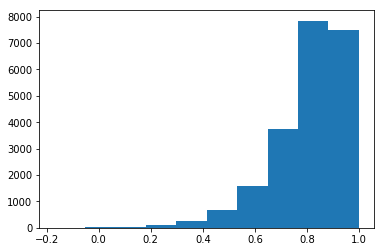

In [75]:
plt.hist(sims)

(array([  11.,   49.,  196.,  611., 1504., 3013., 5141., 6311., 4205.,
         706.]),
 array([-0.36249947, -0.2314382 , -0.10037693,  0.03068433,  0.1617456 ,
         0.29280687,  0.42386814,  0.55492941,  0.68599067,  0.81705194,
         0.94811321]),
 <a list of 10 Patch objects>)

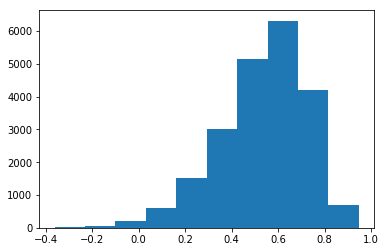

In [78]:
plt.hist(random_sims)

In [80]:
def load_sent(path):
        data_pair1 = []
        data_pair2 = []
        with open(path) as f:
            for line in f:
                line = line.strip().lower()
                if len(line):
                    #print(line)
                    line = line.split('\t')
                    if len(line) == 2:
                        data_pair1.append(line[0].split(" "))
                        data_pair2.append(line[1].split(" "))
                    else:
                        #print(line)
                        pass
                    
        assert len(data_pair1) == len(data_pair2)
        print("Sample: ", data_pair1[0], data_pair2[0])
        return data_pair1, data_pair2
   
    
sent_1, sent_2 = load_sent('./bible_train.txt')

Sample:  ['be', 'not', 'thou', 'envious', 'against', 'evil', 'men;', 'neither', 'desire', 'to', 'be', 'with', 'them:'] ['do', 'not', 'envy', 'men', 'of', 'evil,', 'and', 'do', 'not', 'desire', 'to', 'be', 'with', 'them.']


In [82]:
#random
test_i = np.random.randint(low=0, high=len(z_vecs1))
print(sent_1[test_i])

['and', 'i', 'will', 'make', 'all', 'my', 'mountains', 'a', 'way,', 'and', 'my', 'highways', 'shall', 'be', 'exalted.']


In [83]:
from sklearn.metrics.pairwise import cosine_similarity

In [84]:
cosine_sims = cosine_similarity(z_vecs1, z_vecs2)

In [85]:
cosine_sims.shape

(21747, 21747)

In [86]:
max_match = np.argmax(cosine_sims[test_i])
print(sent_2[max_match])

['and', 'i', 'will', 'walk', 'about', 'in', 'your', 'midst,', 'and', 'i', 'shall', 'be', 'your', 'god,', 'and', 'you', 'shall', 'be', 'my', 'people.']


In [94]:
same_ind = 0
for test_i in range(len(z_vecs1)):
    test_i = np.random.randint(low=0, high=len(z_vecs1))
    max_match = np.argmax(cosine_sims[test_i])
#     if test_i == max_match:
#         same_ind += 1
    print(cosine_sims[test_i][max_match])
    print("\t" + " ".join(sent_1[test_i]))
    print("\t" + " ".join(sent_2[max_match]) )
    print()

0.9791782
	and he led me toward the south; and, behold, a gate toward the south: and he measured the posts thereof and the arches thereof according to these measures.
	he removed the high places, and he smashed the stone pillars; he cut down the poles of asherah worship and demolished the bronze serpent which moses had made, for up to those days the israelites were offering incense to it and called it nehushtan.

0.97993237
	and balak the son of zippor saw all that israel had done to the amorites.
	they were near jebus, and the day was far spent, and the servant said to his master, "please, come, let us turn aside to this city of the jebusites, and let us spend the night in it."

0.96296316
	this is jehovah's doing; it is marvellous in our eyes.
	this is from yahweh; it is wonderful in our eyes.

0.9546711
	thy cheeks are comely with plaits of hair, thy neck with strings of jewels.
	serve yahweh with joy; come into his presence with exultation.

0.96945953
	go up to the mountain, and b

	so all the men of israel went up from following david, and followed sheba the son of bichri; but the men of judah clave unto their king, from the jordan even to jerusalem.
	the land of tappuah belonged to manasseh, but tuppuah on the border of manasseh belonged to the descendants of ephraim.

0.9959785
	and the arabah unto the sea of chinneroth, eastward, and unto the sea of the arabah, even the salt sea, eastward, the way to beth-jeshimoth; and on the south, under the slopes of pisgah:
	sihon king of the amorites, who lived in heshbon, and ruled from aroer, which is on the edge of the wadi of arnon, from the middle of the valley and half of gilead, up to the jabbok river, which marks the border of the ammonites;

0.96546006
	and if she be married to a husband, while her vows are upon her, or the rash utterance of her lips, wherewith she hath bound her soul,
	and this shall happen: there will be a stench instead of perfume, and a rope instead of a sash, and baldness instead of a well-

0.98568857
	and elisha said unto the king of israel, what have i to do with thee? get thee to the prophets of thy father, and to the prophets of thy mother. and the king of israel said unto him, nay; for jehovah hath called these three kings together to deliver them into the hand of moab.
	then shemaiah the prophet came to rehoboam and the princes of judah who had gathered at jerusalem from before shishak. and he said to them, "thus says yahweh: 'you yourselves have abandoned me, and i myself have surely abandoned you into the hand of shishak.'"

0.9808761
	and other fell into the good ground, and grew, and brought forth fruit a hundredfold. as he said these things, he cried, he that hath ears to hear, let him hear.
	so king joash did not remember the loyal love that jehoiada had shown to him, and he killed his son. and as he was dying he said, "may yahweh see and avenge!"

0.9744915
	and the serpent cast out of his mouth after the woman water as a river, that he might cause her to be 

0.97737765
	from thence they journeyed unto gudgodah; and from gudgodah to jotbathah, a land of brooks of water.
	and the word of yahweh came to me a second time, saying, "what are you seeing?" and i said, "i am seeing a boiling pot, and its face is from the face of the north."

0.8936748
	salute ampliatus my beloved in the lord.
	greet ampliatus, my dear friend in the lord.

0.96236086
	a friend loveth at all times; and a brother is born for adversity.
	this is the city of rejoicing that lived securely; the one saying in her heart, "i am, and there is none besides me." how she has become a desolation, a lair for wild animals! everyone who passes by her hisses and shakes his fist.

0.9399988
	and i appoint unto you a kingdom, even as my father appointed unto me,
	but if i say, "i will not mention him and i will no longer speak in his name," then it becomes in my heart like a fire burning, locked up in my bones, and i struggle to contain it, and i am not able.

0.9804856
	the children o

0.9678088
	and running under the lee of a small island called cauda, we were able, with difficulty, to secure the boat:
	and running under the lee of a certain small island called cauda, we were able with difficulty to get the ship's boat under control.

0.93516046
	and i besought thy disciples to cast it out; and they could not.
	and if i were to send a plague to that land, and i pour out my rage on it with blood to cut it off, both human and animal,

0.96964383
	now paul and his company set sail from paphos, and came to perga in pamphylia: and john departed from them and returned to jerusalem.
	and i will bring descendant s out from jacob, and a people from judah to take possession of my mountain, and my chosen ones shall inherit it, and my servants shall settle there.

0.9830741
	and azariah slept with his fathers; and they buried him with his fathers in the city of david: and jotham his son reigned in his stead.
	and solomon slept with his ancestors, and they buried him in the city


0.97750527
	and they, when they heard that he was alive, and had been seen of her, disbelieved.
	when i say to the righteous, 'certainly he will live,' and he trusted in his righteousness, and he turns and he does injustice, all of his righteousness will not be remembered, and because of his injustice that he did, because of it he will die.

0.9949744
	and shemaiah the son of nethanel the scribe, who was of the levites, wrote them in the presence of the king, and the princes, and zadok the priest, and ahimelech the son of abiathar, and the heads of the fathers' houses of the priests and of the levites; one fathers' house being taken for eleazar, and one taken for ithamar.
	the tents of edom and the ishmaelites, moab and the hagrites,

0.97751725
	behold, my servant, whom i uphold; my chosen, in whom my soul delighteth: i have put my spirit upon him; he will bring forth justice to the gentiles.
	look! here is my servant; i hold him, my chosen one, in whom my soul delights. i have put m

0.9797913
	now joab fought against rabbah of the children of ammon, and took the royal city.
	and eshton fathered beth-rapha, paseah, and tehinnah, the father of the city of nahash. these are the men of recah.

0.96133745
	and the king said unto him, why speakest thou any more of thy matters? i say, thou and ziba divide the land.
	just as yahweh commanded to moses, so the daughters of zelophehad did:

0.9840835
	therefore prophesy concerning the land of israel, and say unto the mountains and to the hills, to the watercourses and to the valleys, thus saith the lord jehovah: behold, i have spoken in my jealousy and in my wrath, because ye have borne the shame of the nations:
	but paul chose silas and departed, after being commended to the grace of the lord by the brothers.

0.97481465
	saying, what thou seest, write in a book and send it to the seven churches: unto ephesus, and unto smyrna, and unto pergamum, and unto thyatira, and unto sardis, and unto philadelphia, and unto laodicea.
	

0.98652464
	glorious art thou and excellent, from the mountains of prey.
	from the sons of immer: hanani and zebadiah.

0.98629975
	and from jesus christ, who is the faithful witness, the firstborn of the dead, and the ruler of the kings of the earth. unto him that loveth us, and loosed us from our sins by his blood;
	the declaration of the hearer of god's words, and the knower of the knowledge of the most high, who sees the vision of shaddai, who is falling, and his eyes are revealed.

0.96091706
	all the days of the afflicted are evil; but he that is of a cheerful heart hath a continual feast.
	but the man who is unclean and does not purify himself, that person will be cut off from the midst of the assembly because he defiled the sanctuary of yahweh; the water of impurity was not sprinkled on him; he is unclean.

0.9833553
	and others fell upon the good ground, and yielded fruit, some a hundredfold, some sixty, some thirty.
	and to them the word of yahweh will be blah-blah upon blah-

	indeed, like a stubborn heifer, israel is stubborn; now yahweh will feed them, like a lamb in broad pasture.

0.9797644
	the good man out of the good treasure of his heart bringeth forth that which is good; and the evil man out of the evil treasure bringeth forth that which is evil: for out of the abundance of the heart his mouth speaketh.
	now the remainder of the acts of pekahiah and all that he did, look, they are written in the scroll of the events of the days of the kings of israel.

0.9585213
	forty stripes he may give him, he shall not exceed; lest, if he should exceed, and beat him above these with many stripes, then thy brother should seem vile unto thee.
	and when jesus heard these things, he marveled at him, and turning around to the crowd that was following him, he said, "i tell you, not even in israel have i found such great faith!"

0.9819666
	for as the lightning cometh forth from the east, and is seen even unto the west; so shall be the coming of the son of man.
	"son 

0.9751365
	but when a stronger than he shall come upon him, and overcome him, he taketh from him his whole armor wherein he trusted, and divideth his spoils.
	and of gad he said, "blessed be the one who enlarges gad; like a lion he dwells, and he tears an arm as well as a scalp.

0.9160326
	woe is me, that i sojourn in meshech, that i dwell among the tents of kedar!
	even because of the extraordinary degree of the revelations. therefore, so that i would not exalt myself, a thorn in the flesh was given to me, a messenger of satan, in order that it would torment me so that i would not exalt myself.

0.96571517
	and jonadab said unto the king, behold, the king's sons are come: as thy servant said, so it is.
	luke the physician, our dear friend, greets you, as does demas.

0.89775103
	and i will thrust thee from thine office; and from thy station shalt thou be pulled down.
	i will cause mountains and hills to dry up, and i will cause all their herbage to wither; and i will make rivers like


0.95865774
	and moses called unto all israel, and said unto them, ye have seen all that jehovah did before your eyes in the land of egypt unto pharaoh, and unto all his servants, and unto all his land;
	now some of the sadducees—who deny that there is a resurrection—came up and asked him,

0.9848775
	and i will set up one shepherd over them, and he shall feed them, even my servant david; he shall feed them, and he shall be their shepherd.
	and after these things, he went out and saw a tax collector named levi sitting at the tax booth, and he said to him, "follow me!"

0.9830305
	and he spake kindly to him, and set his throne above the throne of the kings that were with him in babylon,
	and on the twenty-third day of the seventh month he sent the people away to their tents rejoicing and festive of heart on account of the goodness that yahweh had done for david, solomon, and israel his people.

0.98479056
	and the battle went sore against saul, and the archers overtook him; and he was d

	their tents and their flocks shall they take; they shall carry away for themselves their curtains, and all their vessels, and their camels; and they shall cry unto them, terror on every side!
	they will take their tents, and their flocks, their tent curtains, and all their equipment, and their camels they will carry away for themselves, and they will call to them, 'terror is from all around.'

0.9700915
	beyond the jordan, in the land of moab, began moses to declare this law, saying,
	in the fiftieth year of azariah king of judah, pekahiah the son of menahem began to reign over israel in samaria for two years.

0.9824601
	for the king had taken counsel, and his princes, and all the assembly in jerusalem, to keep the passover in the second month.
	from the wilderness and the lebanon, up to the great river, the river euphrates, all of the land of the hittites, and up to the great sea in the west, will be your territory.

0.97643703
	therefore hear ye the counsel of jehovah, that he hath

0.9516288
	remember this, that the enemy hath reproached, o jehovah, and that a foolish people hath blasphemed thy name.
	then say, "save us, o god of our salvation; gather us and rescue us from the nations that we may give thanks to your holy name and glory in your praise.

0.98429906
	o jehovah, i have heard the report of thee, and am afraid: o jehovah, revive thy work in the midst of the years; in the midst of the years make it known; in wrath remember mercy.
	o yahweh, i have heard the report of you; o yahweh, i stand in awe of your works. in the midst of the years, revive it! in the midst of the years, make it known! in wrath, may you remember to show compassion.

0.92854
	added this also to them all, that he shut up john in prison.
	see, he travails with evil. he is pregnant with trouble, and he gives birth to deception.

0.961388
	therefore let us also, seeing we are compassed about with so great a cloud of witnesses, lay aside every weight, and the sin which doth so easily bese

0.95244807
	and he said unto her, what wouldest thou? she saith unto him, command that these my two sons may sit, one on thy right hand, and one on thy left hand, in thy kingdom.
	so yahweh's anger burned on that day, and he swore an oath, saying,

0.95341617
	and peter calling to remembrance saith unto him, rabbi, behold, the fig tree which thou cursedst is withered away.
	bel bows down; nebo is stooping. their idols are on animals and on cattle; your cargo is carried as a burden on weary animals.

0.9536787
	and if a man's hair be fallen off his head, he is bald; yet is he clean.
	is this man coniah a despised, shattered vessel? or a vessel in which there is no delight? why are he and his offspring thrown far, and cast away to the land that they do not know?"

0.9895127
	the lot causeth contentions to cease, and parteth between the mighty.
	and king zedekiah sent jehucal the son of shelemiah, and zephaniah the son of maaseiah, the priest, to jeremiah the prophet, saying, "please pray

0.9664655
	he hath builded against me, and compassed me with gall and travail.
	now jehoshaphat had much wealth and honor, and he became son-in-law to ahab.

0.9877285
	then zedekiah the king sent, and fetched him: and the king asked him secretly in his house, and said, is there any word from jehovah? and jeremiah said, there is. he said also, thou shalt be delivered into the hand of the king of babylon.
	now, o king, establish the edict and you must sign the document so that it cannot be changed, according to the law of the medes and persians which cannot be revoked."

0.9681594
	for that they exchanged the truth of god for a lie, and worshipped and served the creature rather than the creator, who is blessed for ever. amen.
	the ear that hears and the eye that sees, yahweh has made them both.

0.99183035
	and over the king's treasures was azmaveth the son of adiel: and over the treasures in the fields, in the cities, and in the villages, and in the castles, was jonathan the son of uzz

	so the king, darius, signed the writing and the interdict.

0.9808046
	and whoso falleth not down and worshippeth shall the same hour be cast into the midst of a burning fiery furnace.
	the righteous hates a word of falsehood; the wicked will bring shame and disgrace.

0.980472
	a good man leaveth an inheritance to his children's children; and the wealth of the sinner is laid up for the righteous.
	then nebuchadnezzar the king was astonished, and he rose up in haste and he asked, saying to his advisers, "did we not throw three men, bound, into the midst of the fire? they answered, saying to the king, "certainly, o king!"

0.9741059
	and when the flesh hath in the skin thereof a boil, and it is healed,
	"'but if his sacrifice is for a vow or as a freewill offering, it must be eaten on the day of his presenting his sacrifice, and on the next day the remainder from it may be eaten,

0.96711177
	thy head upon thee is like carmel, and the hair of thy head like purple; the king is held capt

0.95668644
	my tongue also shall talk of thy righteousness all the day long; for they are put to shame, for they are confounded, that seek my hurt.
	nor do they put new wine into old wineskins. otherwise the wineskins burst and the wine is spilled, and the wineskins are destroyed. but they put new wine into new wineskins and both are preserved."

0.9734544
	now when athaliah the mother of ahaziah saw that her son was dead, she arose and destroyed all the seed royal.
	now when athaliah the mother of ahaziah saw that her son was dead, she arose and murdered all the royal descendants of the house of judah.

0.96617097
	and seeing them distressed in rowing, for the wind was contrary unto them, about the fourth watch of the night he cometh unto them, walking on the sea; and he would have passed by them:
	over the first working group for the first month: jashobeam the son of zabdiel. and he was over his working group of twenty-four thousand.

0.9806955
	and david sent to joab, saying, send m

	therefore, thus says yahweh the god of israel, 'look, i am bringing disaster upon jerusalem and judah about which the two ears of all who hear it will tingle.

0.9738528
	so moses spake unto aaron, and to his sons, and unto all the children of israel.
	and the sons of jada the brother of shammai: jether and jonathan. and jether died without children.

0.987666
	his oblation was one silver platter, the weight whereof was a hundred and thirty shekels, one silver bowl of seventy shekels, after the shekel of the sanctuary; both of them full of fine flour mingled with oil for a meal-offering;
	now the pillars, the height of one pillar was eighteen cubits, and a thread of twelve cubits surrounded it, and its thickness was four fingers, hollowed out.

0.97192234
	who shall lay anything to the charge of god's elect? it is god that justifieth;
	then he said to his disciples, "the harvest is plentiful, but the workers are few.

0.95356745
	wilt not thou possess that which chemosh thy god giveth

0.97868377
	and the border of their inheritance was zorah, and eshtaol, and ir-shemesh,
	now ornan was threshing wheat, and ornan turned and saw the angel, and his four sons with him hid themselves.

0.992838
	and it came to pass, when david was come to mahanaim, that shobi the son of nahash of rabbah of the children of ammon, and machir the son of ammiel of lo-debar, and barzillai the gileadite of rogelim,
	and eliakim son of hilkiah, who was in charge of the palace, came out to him, and shebna the secretary, and joah son of asaph, the reminder.

0.9883639
	and the children of israel asked of jehovah (for the ark of the covenant of god was there in those days,
	and the israelites inquired of yahweh (in those days the ark of the covenant of god was there,

0.9308875
	and she conceived again, and bare a daughter. and jehovah said unto him, call her name lo-ruhamah; for i will no more have mercy upon the house of israel, that i should in any wise pardon them.
	and i will make rabbah as a

0.978454
	and whosoever toucheth his bed shall wash his clothes, and bathe himself in water, and be unclean until the even.
	in issachar and asher, manasseh had beth-shean and its villages, ibleam and its villages, the inhabitants of dor and its villages, the inhabitants of en-dor and its villages, the inhabitants of taanach and its villages, the inhabitants of megiddo and its villages; the third is napheth.

0.9777375
	but shall minister with their brethren in the tent of meeting, to keep the charge, and shall do no service. thus shalt thou do unto the levites touching their charges.
	indeed, the life of all flesh, its blood, is in its life, so i said to the israelites, 'you may not eat the blood of any flesh, because the life of all flesh is its blood; anyone who eats it must be cut off.'

0.94528896
	give not sleep to thine eyes, nor slumber to thine eyelids;
	when ephraim multiplied altars to expiate sins, they became to him altars to sin on.

0.91421497
	i am a sojourner in the ea

	so we fasted and sought our god for this and he responded to our prayer.

0.9478262
	but unto this day, whensoever moses is read, a veil lieth upon their heart.
	but until today, whenever moses is read aloud, a veil lies upon their heart,

0.98532254
	nebuchadnezzar also carried of the vessels of the house of jehovah to babylon, and put them in his temple at babylon.
	and over the working groups of the second month: dodai the ahohite and his working group, and mikloth the commander. and he was over his working group of twenty-four thousand.

0.94946486
	and their children, whom he raised up in their stead, them did joshua circumcise: for they were uncircumcised, because they had not circumcised them by the way.
	the voices of your watchmen! they lift up their voices; together they sing for joy; for they clearly see yahweh's return to zion.

0.98378414
	for the wave-breast and the heave-thigh have i taken of the children of israel out of the sacrifices of their peace-offerings, and hav

0.95863825
	so it was alway: the cloud covered it, and the appearance of fire by night.
	then he overlaid the house with precious stone as decoration. (now the gold was the gold of parvaim.)

0.9589086
	and they that were with me beheld indeed the light, but they heard not the voice of him that spake to me.
	and they watched him closely and sent spies who pretended they were upright, in order that they could catch him in a statement, so that they could hand him over to the authority and the jurisdiction of the governor.

0.95501226
	every word of god is tried: he is a shield unto them that take refuge in him.
	every word of god is flawless; he is a shield for him who takes refuge in him.

0.9808732
	they come from a far country, from the uttermost part of heaven, even jehovah, and the weapons of his indignation, to destroy the whole land.
	raise a signal on a bare hill, lift up your voice to them; wave the hand and may they enter the gateways of the noblemen.

0.97664064
	i therefore h

0.94641787
	whom he gathered together, with the workmen of like occupation, and said, sirs, ye know that by this business we have our wealth.
	and this woman, who is a daughter of abraham, whom satan bound eighteen long years—is it not necessary that she be released from this bond on the day of the sabbath?"

0.97823685
	for a multitude of the people, even many of ephraim and manasseh, issachar and zebulun, had not cleansed themselves, yet did they eat the passover otherwise than it is written. for hezekiah had prayed for them, saying, the good jehovah pardon every one
	as the shame of a thief when he is caught in the act, so the house of israel will be ashamed. they, their kings, their officials, and their priests, and their prophets.

0.9876581
	and these are the names of the sons of gershom: libni and shimei.
	and the sons of jonathan: peleth and zaza. these were the children of jerahmeel.

0.9774291
	what doest thou here? and whom hast thou here, that thou hast hewed thee out here 

0.9782756
	and the sword shall fall upon their cities, and shall consume their bars, and devour them, because of their own counsels.
	the people of lod, hadid, and ono, seven hundred and twenty-five;

0.9724892
	the earth, o jehovah, is full of thy lovingkindness: teach me thy statutes.
	zela, haeleph, jebus (that is, jerusalem), gibeah, and kiriath; fourteen cities and their villages. this is the inheritance of the descendants of benjamin according to their families.

0.9775425
	and when he had given him leave, paul, standing on the stairs, beckoned with the hand unto the people; and when there was made a great silence, he spake unto them in the hebrew language, saying,
	it happened that the king of israel was crossing over on the wall, and a woman called out to him, saying, "help, my lord the king!"

0.9663027
	exalt her, and she will promote thee; she will bring thee to honor, when thou dost embrace her.
	not to us, o yahweh, not to us, but to your name give glory, because of your l

	behold, i send you forth as sheep in the midst of wolves: be ye therefore wise as serpents, and harmless as doves.
	but naaman became angry and he went and said, "look, i said to myself, 'surely he will come out, stand, call upon the name of yahweh his god, and wave his hands over the spot; then he would take away the skin disease.'

0.99722123
	the word of jehovah that came unto hosea the son of beeri, in the days of uzziah, jotham, ahaz, and hezekiah, kings of judah, and in the days of jeroboam the son of joash, king of israel.
	the word of yahweh that came to hosea son of beeri, in the days of uzziah, jotham, ahaz, and hezekiah, the kings of judah, and in the days of jeroboam the son of joash, king of israel.

0.9675546
	the king's favor is toward a servant that dealeth wisely; but his wrath will be against him that causeth shame.
	a man who is skillful in his work, you shall see: before kings, he will serve; he will not serve before the commoners.

0.92758816
	i did know thee in t

0.967902
	there shall be no prostitute of the daughters of israel, neither shall there be a sodomite of the sons of israel.
	and if indeed some of the meat of his fellowship offerings' sacrifice is eaten on the third day, it will not be accepted; it will not be considered of benefit for the one who presented it—it shall be unclean meat, and the person who eats it shall bear his guilt.

0.9587925
	for as a young man marrieth a virgin, so shall thy sons marry thee; and as the bridegroom rejoiceth over the bride, so shall thy god rejoice over thee.
	"declare this in the house of jacob, and proclaim it in judah, saying,

0.93829423
	blessed be the god and father of our lord jesus christ, who hath blessed us with every spiritual blessing in the heavenly places in christ:
	blessed is the god and father of our lord jesus christ, who has blessed us with every spiritual blessing in the heavenly places in christ,

0.9303147
	and the seven angels that had the seven trumpets prepared themselves to

0.9844445
	and the report concerning them came to the ears of the church which was in jerusalem: and they sent forth barnabas as far as antioch:
	and benaiah son of jehoiada was over the kerethites and the pelethites. and the sons of david were chief officials under the hand of the king.

0.98160154
	jehoiachin was eight years old when he began to reign; and he reigned three months and ten days in jerusalem: and he did that which was evil in the sight of jehovah.
	jehoiachin was eighteen years old when he became king, and he reigned three months and ten days in jerusalem. and he did evil in the eyes of yahweh.

0.97742134
	and jesus said, i am: and ye shall see the son of man sitting at the right hand of power, and coming with the clouds of heaven.
	so the two of them sat and ate and drank together, and the father of the young woman said to the man, "please, agree to spend the night and enjoy yourself."

0.9598307
	jehovah thy god will raise up unto thee a prophet from the midst of the

	therefore, because we have a great high priest who has gone through the heavens, jesus the son of god, let us hold fast to our confession.

0.9842208
	and the liers-in-wait hasted, and rushed upon gibeah; and the liers-in-wait drew themselves along, and smote all the city with the edge of the sword.
	and joshua captured all the cities of these kings, and all their kings, and he utterly destroyed them with the edge of the sword, as moses the servant of yahweh commanded.

0.97027135
	and those on the rock are they who, when they have heard, receive the word with joy; and these have no root, who for a while believe, and in time of temptation fall away.
	and also what is first of all of the firstfruits of everything, and of all of the contribution of everything from all of your contributions, to the priest it belongs, and what is first of your dough you shall give to the priest, so that a blessing may rest on your house.

0.9742803
	thus saith the lord jehovah: in the day when he went dow

0.89780426
	for thus saith jehovah: like as i have brought all this great evil upon this people, so will i bring upon them all the good that i have promised them.
	but if what i do not want to do, this i do, i agree with the law that it is good.

0.9556383
	i will give thee thanks for ever, because thou hast done it; and i will hope in thy name, for it is good, in the presence of thy saints.
	and he said, "o yahweh, please remember how i have walked before your presence in faithfulness with a whole heart, and i have done the good in your eyes!" and hezekiah wept with great weeping.

0.97152984
	when he established the heavens, i was there: when he set a circle upon the face of the deep,
	when he established the heavens, there i was, when he drew a circle upon the face of the deep,

0.919692
	and the chief captain answered, with a great sum obtained i this citizenship. and paul said, but i am a roman born.
	"as i live," declares the lord yahweh, "surely with a strong hand and with an ou

0.9710267
	the three and twentieth to delaiah, the four and twentieth to maaziah.
	and come, go to the exiles, to the children of your people, and you must speak to them, and say to them, 'thus says the lord yahweh!' whether they listen or whether they fail to listen."

0.98029345
	moreover he refused the tent of joseph, and chose not the tribe of ephraim,
	and of the clans of the sons of kohath were cities of their territory out of the tribe of ephraim.

0.9747761
	and the king was grieved; but for the sake of his oaths, and of them that sat at meat with him, he commanded it to be given;
	and then when i, daniel, saw the vision, and i was seeking understanding, there was one standing before me with the appearance of a man.

0.97287846
	now about that time herod the king put forth his hands to afflict certain of the church.
	and they put above his head the charge against him in writing: "this is jesus, the king of the jews."

0.92827064
	the wicked flee when no man pursueth; but the ri

	and joshua said, roll great stones unto the mouth of the cave, and set men by it to keep them:
	and the king of the ammonites said to jephthah's messengers, "because israel took my land from the arnon up to the jabbok and the jordan when they came up from egypt; so then, restore it peacefully."

0.9545455
	and jesus answered and said, o faithless and perverse generation, how long shall i be with you? how long shall i bear with you? bring him hither to me.
	and jesus answered and said, "o unbelieving and perverse generation! how long will i be with you? how long must i put up with you? bring him here to me!"

0.9621891
	jehovah also will be a high tower for the oppressed, a high tower in times of trouble;
	the one who receives a prophet in the name of a prophet will receive a prophet's reward, and the one who receives a righteous person in the name of a righteous person will receive a righteous person's reward.

0.99018615
	and he shall go before his face in the spirit and power of eli

	the children of eliab: nemuel, dathan, and abiram. these are the same dathan and abiram who were appointed of the community, who rebelled against moses and aaron in the company of korah, when they rebelled against yahweh,

0.9835967
	and it came to pass, on one of the days, as he was teaching the people in the temple, and preaching the gospel, there came upon him the chief priests and the scribes with the elders;
	and it happened that in the spring time of year, the time when kings go out to battle, joab led the troops of the army and destroyed the land of the ammonites. and he came and besieged rabbah, but david remained in jerusalem. and joab struck rabbah and destroyed it.

0.9797026
	and whosoever toucheth anything that was under him shall be unclean until the even: and he that beareth those things shall wash his clothes, and bathe himself in water, and be unclean until the even.
	and solomon held a feast at that time of seven days. and all israel was with him, a very great assemb

0.9546133
	we grope for the wall like the blind; yea, we grope as they that have no eyes: we stumble at noonday as in the twilight; among them that are lusty we are as dead men.
	for if we live, we live for the lord, and if we die, we die for the lord. therefore whether we live or whether we die, we are the lord's.

0.97207534
	and there came a voice to him, rise, peter; kill and eat.
	"therefore i will judge you, house of israel, each one according to his ways," declares the lord yahweh. "repent and turn around from all of your transgression, and it will not be as a stumbling block of iniquity to you.

0.9710305
	therefore, behold, the days come, saith jehovah, that i will send unto him them that pour off, and they shall pour him off; and they shall empty his vessels, and break their bottles in pieces.
	now on that same night yahweh said to him, "take the bull of the cattle that belongs to your father, and a second bull seven years old, and pull down the altar of baal that belongs to 

0.9410099
	if grape-gatherers came to thee, would they not leave some gleaning grapes? if thieves by night, would they not destroy till they had enough?
	but they were very afraid, and they said, "look, two kings could not stand before him; how can we stand?"

0.9626766
	whosoever is begotten of god doeth no sin, because his seed abideth in him: and he cannot sin, because he is begotten of god.
	but he, because he continues forever, holds the priesthood permanently.

0.9894554
	the calamity of moab is near to come, and his affliction hasteth fast.
	and king zedekiah sent jehucal the son of shelemiah, and zephaniah the son of maaseiah, the priest, to jeremiah the prophet, saying, "please pray for us to yahweh our god."

0.98278326
	and again he sent unto him another captain of fifty with his fifty. and he answered and said unto him, o man of god, thus hath the king said, come down quickly.
	so he again sent another commander of fifty and his fifty men. he answered and said to him, "o ma

0.97218615
	and with you there shall be a man of every tribe; every one head of his fathers' house.
	and a vision appeared to paul during the night: a certain macedonian man was standing there and imploring him and saying, "come over to macedonia and help us!"

0.9796799
	therefore thus saith the lord jehovah: because ye have spoken falsehood, and seen lies, therefore, behold, i am against you, saith the lord jehovah.
	therefore thus says the lord yahweh: 'because of your speaking falseness and because you envisioned a lie, therefore, look! i am against you!" declares the lord yahweh.

0.9641343
	for days beyond a year shall ye be troubled, ye careless women; for the vintage shall fail, the ingathering shall not come.
	"'anyone from aaron's offspring, if he is afflicted with a skin disease or a fluid discharge, shall not eat in the sanctuary until he is clean; and the one who touches any unclean person or a man from whom an emission of semen goes out,

0.97097534
	by the multitude of t

	and he said, "you must not fear, o beloved man. peace be to you; be strong and be courageous!" and when he spoke with me, i was strengthened and i said, "let my lord speak, for you have strengthened me."

0.947958
	and he released him that for insurrection and murder had been cast into prison, whom they asked for; but jesus he delivered up to their will.
	for herod was afraid of john, because he knew him to be a righteous and holy man and protected him. and when he listened to him, he was greatly perplexed, and yet he listened to him gladly.

0.99574256
	and zadok the son of ahitub, and abimelech the son of abiathar, were priests; and shavsha was scribe;
	zadok the son of ahitub and ahimelech the son of abiathar were priests and seraiah was scribe.

0.91852456
	god is a righteous judge, yea, a god that hath indignation every day.
	god is a righteous judge, and a god who has indignation every day.

0.9708955
	and said, this man said, i am able to destroy the temple of god, and to build

0.97874403
	from mount hor ye shall mark out unto the entrance of hamath; and the goings out of the border shall be at zedad;
	and they shall build the ancient ruins, they shall erect the former deserted places. and they shall restore the devastated cities, the deserted places of many generations.

0.97972804
	and when jehoiakim the king, with all his mighty men, and all the princes, heard his words, the king sought to put him to death; but when uriah heard it, he was afraid, and fled, and went into egypt.
	so that the violence done to the seventy brothers of abimelech would be avenged and their blood be placed on abimelech their brother, who killed them, and on the lords of shechem, who helped to kill his brothers.

0.96181214
	thou that sayest a man should not commit adultery, dost thou commit adultery? thou that abhorrest idols, dost thou rob temples?
	'thus says yahweh: "do not go up, and do not fight against your brothers. return, each man to his house, for this matter has come fr

	for he perceived that for envy the chief priests had delivered him up.
	he sent among them flies that devoured them and frogs that destroyed them.

0.9729303
	because of their wickedness which they have committed to provoke me to anger, in that they went to burn incense, and to serve other gods, that they knew not, neither they, nor ye, nor your fathers.
	because of their wickedness that they committed to provoke me to anger by going to make smoke offerings, serving other gods whom they had not known, neither they, you, or your ancestors.

0.980373
	neither shall they say, lo, here! or, there! for lo, the kingdom of god is within you.
	ammiel the sixth, issachar the seventh, peullethai the eighth; for god blessed him.

0.95916086
	and agrippa said unto paul, with but little persuasion thou wouldest fain make me a christian.
	and a certain ruler asked him, saying, "good teacher, by doing what will i inherit eternal life?"

0.9585213
	forty stripes he may give him, he shall not exceed; 


0.92824143
	say unto god, how terrible are thy works! through the greatness of thy power shall thine enemies submit themselves unto thee.
	those who trust in yahweh are like mount zion, which cannot be moved, but abides forever.

0.96348673
	be not wise in thine own eyes; fear jehovah, and depart from evil:
	and no inhabitant will say, "i am sick"; the people who live in it, their iniquity will be taken away.

0.98165226
	if his sin, which he hath sinned, be made known to him, then he shall bring for his oblation a goat, a female without blemish, for his sin which he hath sinned.
	at that time, berodak-baladan the son of baladan king of babylon sent letters and a gift to hezekiah, for he had heard that hezekiah had been ill.

0.97580796
	and the soldiers led him away within the court, which is the praetorium; and they call together the whole band.
	now on the first day of the week, at very early dawn, they came back to the tomb bringing the fragrant spices which they had prepared.

0.

	for behold, when the voice of thy salutation came into mine ears, the babe leaped in my womb for joy.
	then uzziah, his censer in hand to burn incense, became angry. and when he became angry with the priests, then leprosy appeared on his forehead in front of the priests in the house of yahweh at the altar of incense.

0.9489001
	but it came to pass after a while, in the time of wheat harvest, that samson visited his wife with a kid; and he said, i will go in to my wife into the chamber. but her father would not suffer him to go in.
	and he makes them skip like a calf; lebanon and sirion like a young wild ox.

0.96774423
	and this is love, that we should walk after his commandments. this is the commandment, even as ye heard from the beginning, that ye should walk in it.
	but he looked intently at them and said, "what then is this that is written: 'the stone which the builders rejected, this has become the cornerstone.'

0.9733914
	but there was a certain man, simon by name, who beforet

0.9760924
	my strength is dried up like a potsherd; and my tongue cleaveth to my jaws; and thou hast brought me into the dust of death.
	uriah said to david, "the ark and israel and judah are living in the booths; and my lord joab and the servants of my lord are camping on the surface of the open field; and i, shall i go to my house to eat and to drink and to sleep with my wife? by your life and the life of your soul, i surely will not do this thing."

0.98388803
	for the waves of death compassed me; the floods of ungodliness made me afraid:
	for the ephraimites: hoshea the son of azaziah. for the half-tribe of manasseh: joel the son of pedaiah.

0.96500844
	behold, i have graven thee upon the palms of my hands; thy walls are continually before me.
	all sources of light in the heavens, i will make them dark over you, and i will put darkness on your land,'" declares the lord yahweh.

0.94955605
	let my soul live, and it shall praise thee; and let thine ordinances help me.
	arise, and le

0.9877525
	and i, even i artaxerxes the king, do make a decree to all the treasurers that are beyond the river, that whatsoever ezra the priest, the scribe of the law of the god of heaven, shall require of you, it be done with all diligence,
	now the midianites, amalekites, and all the people of the east were lying in the valley, like a great multitude of locusts; their camels were without number, as numerous as the sand that is on the shore of the sea.

0.9856108
	and from thence he went against the inhabitants of debir. (now the name of debir beforetime was kiriath-sepher.)
	zadok the son of ahitub and ahimelech the son of abiathar were priests and seraiah was scribe.

0.9210948
	grace be with you all. amen.
	if you sit down, you will not panic, and if you lie down, then your sleep shall be sweet.

0.9889796
	mine eye poureth down, and ceaseth not, without any intermission,
	and elioenai, jaakobah, jeshohaiah, asaiah, adiel, jesimiel, benaiah,

0.97971165
	take heed lest there shall 

0.900131
	hast thou not heard how i have done it long ago, and formed it of ancient times? now have i brought it to pass, that it should be thine to lay waste fortified cities into ruinous heaps.
	and you must build against it siege works, and you must build against it a bulwark, and you must heap against it a siege ramp, and you must set up against it camps and put against it a battering ram all around.

0.9751632
	for thou hast forsaken thy people the house of jacob, because they are filled with customs from the east, and are soothsayers like the philistines, and they strike hands with the children of foreigners.
	now the high priest rose up and all those who were with him (that is, the party of the sadducees), and they were filled with jealousy.

0.9687742
	and he brought me to the north gate: and he measured it according to these measures;
	and after he had explained everything to them, he sent them to joppa.

0.9606084
	a false witness shall perish; but the man that heareth shall 

0.9945277
	and out of the tribe of reuben, bezer with its suburbs, and jahaz with its suburbs,
	and out of the tribe of issachar: kedesh with its pasturelands, daberath with its pasturelands,

0.98608524
	the snorting of his horses is heard from dan: at the sound of the neighing of his strong ones the whole land trembleth; for they are come, and have devoured the land and all that is in it; the city and those that dwell therein.
	and this shall happen: on that day, yahweh will whistle for the fly that is at the end of the stream of egypt and the bee that is in the land of assyria.

0.96120554
	the men of arvad with thine army were upon thy walls round about, and valorous men were in thy towers; they hanged their shields upon thy walls round about; they have perfected thy beauty.
	the children of eliab: nemuel, dathan, and abiram. these are the same dathan and abiram who were appointed of the community, who rebelled against moses and aaron in the company of korah, when they rebelled aga

0.90923035
	and these words, which i command thee this day, shall be upon thy heart;
	and jesus answered and said to him, "it is written, 'you shall worship the lord your god, and serve only him.'"

0.977199
	jehovah of hosts hath purposed it, to stain the pride of all glory, to bring into contempt all the honorable of the earth.
	these are the kings of the land whom the israelites defeated, and of whose land they took possession beyond the jordon to the east, from the wadi of arnon up to mount hermon, and all the arabah to the east:

0.97717077
	and he will destroy in this mountain the face of the covering that covereth all peoples, and the veil that is spread over all nations.
	and this shall happen: on that day, yahweh will whistle for the fly that is at the end of the stream of egypt and the bee that is in the land of assyria.

0.94853127
	but they held their peace. and he took him, and healed him, and let him go.
	but the wise ones answered saying, "certainly there will never be e

	so nebuzaradan, the captain of the guard, sent word, along with nebushazban the chief officer, and nergal-sharezer the high official, and all the chief officers of the king of babylon.

0.9703882
	gracious is jehovah, and righteous; yea, our god is merciful.
	gracious is yahweh and righteous, and our god is merciful.

0.9600394
	as an ear-ring of gold, and an ornament of fine gold, so is a wise reprover upon an obedient ear.
	"for thus says yahweh: 'we have heard a sound of trembling, terror, and there is no peace.

0.963502
	yet these may ye eat of all winged creeping things that go upon all fours, which have legs above their feet, wherewith to leap upon the earth.
	whom jason has entertained as guests! and these people are all acting contrary to the decrees of caesar, saying there is another king, jesus!"

0.97519004
	the children of jaalah, the children of darkon, the children of giddel,
	the border of the amorites ran from the ascent of akrabbim from sela and upward.

0.95586103
	

0.98544264
	and they that passed by railed on him, wagging their heads, and saying, ha! thou that destroyest the temple, and buildest it in three days,
	and yahweh asked me, "what are you seeing, jeremiah?" and i said, "figs—the good figs, very good, and the bad figs, very bad, that cannot be eaten because of their bad quality."

0.9908862
	but when ahaziah the king of judah saw this, he fled by the way of the garden-house. and jehu followed after him, and said, smite him also in the chariot: and they smote him at the ascent of gur, which is by ibleam. and he fled to megiddo, and died there.
	jehoash king of judah took all of the holy objects that jehoshaphat, joram, and ahaziah his ancestors, the kings of judah, had devoted, and all his holy objects and all of the gold found in the treasuries of the temple of yahweh, and in the palace of the king, and he sent them to hazael king of aram, so that he went up from jerusalem.

0.9822084
	out of heaven he made thee to hear his voice, that 

	and zadok son of ahitub and abimelech son of abiathar were priests, and shavsha was secretary.

0.9841502
	the night is far spent, and the day is at hand: let us therefore cast off the works of darkness, and let us put on the armor of light.
	the night is far gone, and the day has drawn near. therefore let us throw off the deeds of darkness and put on the weapons of light.

0.9669215
	there is a crying in the streets because of the wine; all joy is darkened, the mirth of the land is gone.
	or is god the god of the jews only? is he not also the god of the gentiles? yes, also of the gentiles,

0.97020286
	because they rejected mine ordinances, and walked not in my statutes, and profaned my sabbaths: for their heart went after their idols.
	and all judah was standing before yahweh, and also their little children, their wives, and their children.

0.98780406
	and of the sons of adonikam, that were the last; and these are their names: eliphelet, jeuel, and shemaiah; and with them threescor

0.9843372
	which is easier, to say to the sick of the palsy, thy sins are forgiven; or to say, arise, and take up thy bed, and walk?
	"say to rehoboam, son of solomon, king of judah, and to all israel in judah and benjamin,

0.9115593
	i must needs glory, though it is not expedient; but i will come to visions and revelations of the lord.
	it is necessary to boast; it is not profitable, but i will proceed to visions and revelations of the lord.

0.9323319
	for the sake of the house of jehovah our god i will seek thy good.
	surely just as the gazelle and the deer is eaten, so both the unclean and the clean together may eat it.

0.98917264
	and the men that have been mentioned by name rose up, and took the captives, and with the spoil clothed all that were naked among them, and arrayed them, and shod them, and gave them to eat and to drink, and anointed them, and carried all the feeble of them upon asses, and brought them to jericho, the city of palm-trees, unto their brethren: then they 

	and for the sacrifice of peace-offerings, two oxen, five rams, five he-goats, five he-lambs a year old: this was the oblation of pagiel the son of ochran.
	to whom also abraham apportioned a tenth of everything—in the first place, his name is translated "king of righteousness," and then also "king of salem," that is, "king of peace";

0.99407697
	the labor of the righteous tendeth to life; the increase of the wicked, to sin.
	in the valley of beth haram, beth nimrah, succoth, zaphon, and the rest of the kingdom of sihon king of heshbon, the jordan and its banks, up to the lower end of the kinnereth sea beyond the jordan to the east.

0.9876144
	the children gather wood, and the fathers kindle the fire, and the women knead the dough, to make cakes to the queen of heaven, and to pour out drink-offerings unto other gods, that they may provoke me to anger.
	and the word of yahweh came to me in the morning, saying,

0.93031466
	for that nation and kingdom that will not serve thee shall per

0.9702855
	but my servant caleb, because he had another spirit with him, and hath followed me fully, him will i bring into the land whereinto he went; and his seed shall possess it.
	and jesus and his disciples went out to the villages of caesarea philippi, and on the way he asked his disciples, saying to them, "who do people say that i am?"

0.9854013
	now the rest of the acts of amaziah, are they not written in the book of the chronicles of the kings of judah?
	the remainder of the acts of amaziah, are they not written on the scroll of the events of the days of the kings of judah?

0.934901
	he maketh the storm a calm, so that the waves thereof are still.
	roaring like the lion is the dreaded anger of a king; he who provokes him forfeits his life.

0.98542124
	then came the disciples, and said unto him, knowest thou that the pharisees were offended, when they heard this saying?
	o yahweh, bow the heavens and come down; touch the mountains so that they smoke.

0.97010225
	so shall no 

0.9959047
	and the sons of ethan: azariah.
	the sons of kenaz: othniel and seraiah. and the sons of othniel: hathath.

0.86171955
	streams of water run down mine eyes, because they observe not thy law.
	deacons likewise must be dignified, not insincere, not devoted to much wine, not fond of dishonest gain,

0.97137094
	which jehovah commanded moses in mount sinai, in the day that he commanded the children of israel to offer their oblations unto jehovah, in the wilderness of sinai.
	god stands in the divine assembly; he administers judgment in the midst of the gods.

0.9763431
	yea, brother, let me have joy of thee in the lord: refresh my heart in christ.
	in those days, yahweh began to reduce israel, so hazael defeated them in every territory of israel,

0.97912496
	for the son of man shall come in the glory of his father with his angels; and then shall he render unto every man according to his deeds.
	and he placed the carved image of the idol that he had made in the house of god, of 

0.9720173
	and it shall be no more the confidence of the house of israel, bringing iniquity to remembrance, when they turn to look after them: and they shall know that i am the lord jehovah.
	wisdom and knowledge is given to you. and i will also give to you wealth, possessions, and honor, the like of which was not had by the kings who were before you, nor will there be the like after you."

0.9625658
	ye shall not eat of anything that dieth of itself: thou mayest give it unto the sojourner that is within thy gates, that he may eat it; or thou mayest sell it unto a foreigner: for thou art a holy people unto jehovah thy god. thou shalt not boil a kid in its mother's milk.
	"is not my word like fire?" declares yahweh, "and like a blacksmith's hammer that breaks a rock into pieces?

0.8991495
	and pilate said unto the chief priests and the multitudes, i find no fault in this man.
	when i hold back the heavens so that there is not rain, and when i command the locust to devour the earth, and

0.95460796
	and i will cause elam to be dismayed before their enemies, and before them that seek their life; and i will bring evil upon them, even my fierce anger, saith jehovah; and i will send the sword after them, till i have consumed them:
	and jesus answered and said, "o unbelieving and perverse generation! how long will i be with you? how long must i put up with you? bring him here to me!"

0.9631923
	in like manner also the chief priests mocking him among themselves with the scribes said, he saved others; himself he cannot save.
	how, in his anger, the lord has covered the daughter of zion in a cloud! he has thrown down from heavens to earth the splendor of israel, and he has not remembered his footstool in the day of his anger.

0.9692035
	the baptism of john, whence was it? from heaven or from men? and they reasoned with themselves, saying, if we shall say, from heaven; he will say unto us, why then did ye not believe him?
	how can you say, 'we are wise and the law of yahweh i

0.96931815
	they gave me also gall for my food; and in my thirst they gave me vinegar to drink.
	they also gave me gall for food, and for my thirst they gave me vinegar to drink.

0.9550823
	in all places wherein i have walked with all the children of israel, spake i a word with any of the tribes of israel, whom i commanded to be shepherd of my people israel, saying, why have ye not built me a house of cedar?
	i sink in the mud of the deep, and there is no foothold. i have come to watery depths, and the torrent floods over me.

0.9687803
	he judged the cause of the poor and needy; then it was well. was not this to know me? saith jehovah.
	he was thirty-two years old when he began to reign, and he reigned eight years in jerusalem. and he departed with no one's regret. and they buried him in the city of david, but not in the burial sites of the kings.

0.97178286
	sit thou silent, and get thee into darkness, o daughter of the chaldeans; for thou shalt no more be called the mistress of ki

	and moses said unto them, stay ye, that i may hear what jehovah will command concerning you.
	and you should know with your heart that as a man disciplines his son, so yahweh your god is disciplining you.

0.9141497
	as a bird that wandereth from her nest, so is a man that wandereth from his place.
	like a bird that strays from its nest, so is a man who strays from his place.

0.9814069
	and ye shall take you on the first day the fruit of goodly trees, branches of palm-trees, and boughs of thick trees, and willows of the brook; and ye shall rejoice before jehovah your god seven days.
	and the minds of the rash will understand knowledge, and the tongues of stammerers will hasten to speak clearly.

0.9860116
	for he hath despised the oath by breaking the covenant; and behold, he had given his hand, and yet hath done all these things; he shall not escape.
	and yahweh of hosts is going to swing a whip against him, as when midian was defeated at the rock of oreb; and his staff will be over

0.97067094
	but one hath somewhere testified, saying, what is man, that thou art mindful of him? or the son of man, that thou visitest him?
	gideon said to him, "excuse me, my lord. if yahweh is with us, why then has all this happened to us? where are all his wonderful deeds that our ancestors recounted to us, saying, 'did not yahweh bring us up from egypt?' but now yahweh has forsaken us; he has given us into the palm of midian."

0.99999994
	the sons of reuel: nahath, zerah, shammah, and mizzah.
	 the sons of levi: gershon, kohath, and merari.

0.9842749
	and when rehoboam was come to jerusalem, he assembled the house of judah and benjamin, a hundred and fourscore thousand chosen men, that were warriors, to fight against israel, to bring the kingdom again to rehoboam.
	for a fool speaks folly, and his mind does iniquity: to behave wickedly, and to speak error concerning yahweh, to leave the throat of the hungry empty, and he deprives the thirsty of drink.

0.9270987
	these sought the

	they prate, they speak arrogantly: all the workers of iniquity boast themselves.
	they served the men to eat, but when they ate from the stew, they cried out and said, "there is death in the pot, o man of god!" they were not able to eat it.

0.9397555
	and again, whom should i serve? should i not serve in the presence of his son? as i have served in thy father's presence, so will i be in thy presence.
	shall i myself i break open and not deliver?" says yahweh, "or i who delivers lock up the womb?" says your god.

0.98335
	and the king stood in his place, and made a covenant before jehovah, to walk after jehovah, and to keep his commandments, and his testimonies, and his statutes, with all his heart, and with all his soul, to perform the words of the covenant that were written in this book.
	and his prayer, and how he responded to him, all his sin and his unfaithful acts, and the places where he built the high places and set up asherahs and idols before he humbled himself, behold, they

0.9375976
	mine eyes fail for thy word, while i say, when wilt thou comfort me?
	"and i lay prostrate before yahweh through forty days, and through forty nights i prostrated myself, because yahweh intended to kill you.

0.93453276
	for they all did cast in of their superfluity; but she of her want did cast in all that she had, even all her living.
	will you not again revive us, that your people might rejoice in you?

0.962826
	unto timothy, my true child in faith: grace, mercy, peace, from god the father and christ jesus our lord.
	"i, nebuchadnezzar, was content in my house and prospering in my palace.

0.93598753
	an inheritance may be gotten hastily at the beginning; but the end thereof shall not be blessed.
	but if the priest examines it and if there is not white hair in the spot and it is not deeper than the skin and it is faded, then the priest shall confine him for seven days.

0.9892459
	and jehoash the son of jehoahaz took again out of the hand of ben-hadad the son of hazael t

0.98879653
	and his father zacharias was filled with the holy spirit, and prophesied, saying,
	and his father zechariah was filled with the holy spirit and prophesied, saying,

0.9866142
	of the sons of uzziel, amminadab the chief, and his brethren a hundred and twelve.
	we have heard of the pride of moab —he is very proud— his height, and his pride, and his arrogance, and the haughtiness of his heart.

0.97442174
	for ye shall not go out in haste, neither shall ye go by flight: for jehovah will go before you; and the god of israel will be your rearward.
	and they will say to you, 'behold, there!' 'behold, here!' do not go out or run after them!

0.98419446
	and certain men came down from judaea and taught the brethren, saying, except ye be circumcised after the custom of moses, ye cannot be saved.
	and shebaniah, jehoshaphat, nethanel, amasai, zechariah, benaiah, and elizezer the priests sounded the trumpets before the ark of god. and obed-edom and jehiah were gatekeepers for the ark.

0.89385945
	after this manner therefore pray ye: our father who art in heaven, hallowed be thy name.
	for there is not anything reliable in his mouth; their inner part is destruction. their throat is an open grave; with their tongue they speak deceit.

0.9803921
	and having shod your feet with the preparation of the gospel of peace;
	damascus was trading with you because of the abundance of your products, because of the abundance of all of your wealth, trading with the wine of helbon and white wool.

0.98044527
	then i looked, and, behold, in the firmament that was over the head of the cherubim there appeared above them as it were a sapphire stone, as the appearance of the likeness of a throne.
	and i saw for the temple a platform all the way around the foundations of the side rooms; it was the length of a full reed, six cubits long.

0.95373696
	and the woman conceived; and she sent and told david, and said, i am with child.
	and the one who lives, and i was dead, and behold, i am liv

0.98817146
	but if they be prophets, and if the word of jehovah be with them, let them now make intercession to jehovah of hosts, that the vessels which are left in the house of jehovah, and in the house of the king of judah, and at jerusalem, go not to babylon.
	and if their survivors will escape, they will be on the mountains, like the doves of the valley, all of them groaning, each because of his guilt.

0.9805419
	he saved others; himself he cannot save. he is the king of israel; let him now come down from the cross, and we will believe on him.
	and he said, "why are you going to him today? it is neither the new moon nor the sabbath!" and she said, "peace."

0.97760296
	and i will multiply the fruit of the tree, and the increase of the field, that ye may receive no more the reproach of famine among the nations.
	but the population of the city was divided, and some were with the jews and some with the apostles.

0.97676563
	let us rejoice and be exceeding glad, and let us give the g

	amon was twenty-two years old when he began to reign, and he reigned two years in jerusalem.

0.9746181
	asher drove not out the inhabitants of acco, nor the inhabitants of sidon, nor of ahlab, nor of achzib, nor of helbah, nor of aphik, nor of rehob;
	the priests: the descendants of jedaiah, of the house of jeshua, nine hundred and seventy-three;

0.9577594
	and thou hast patience and didst bear for my name's sake, and hast not grown weary.
	now as for their names, the older was oholah, and oholibah was her sister. and they became mine, and they bore sons and daughters, and their names are samaria for oholah, and jerusalem for oholibah.

0.9357726
	set your mind on the things that are above, not on the things that are upon the earth.
	all the community saw that aaron died; so all the house of israel wept for aaron thirty days.

0.9760445
	this is the third time i am coming to you. at the mouth of two witnesses or three shall every word be established.
	this is the third time i am com

In [93]:
print(same_ind/len(z_vecs1))

0.11665976916356278


In [95]:
y_cosine_sims = cosine_similarity(y_vecs1, y_vecs2)

In [96]:
same_ind = 0
for test_i in range(len(y_vecs1)):
    #test_i = np.random.randint(low=0, high=len(z_vecs1))
    max_match = np.argmax(y_cosine_sims[test_i])
    if test_i == max_match:
        same_ind += 1
#     print(cosine_sims[test_i][max_match])
#     print("\t" + " ".join(sent_1[test_i]))
#     print("\t" + " ".join(sent_2[max_match]) )
#     print()

In [99]:
same_ind/len(y_vecs1)

0.1812663815698717

In [98]:
for _ in range(20):
    test_i = np.random.randint(low=0, high=len(z_vecs1))
    max_match = np.argmax(y_cosine_sims[test_i])
#     if test_i == max_match:
#         same_ind += 1
    print(cosine_sims[test_i][max_match])
    print("\t" + " ".join(sent_1[test_i]))
    print("\t" + " ".join(sent_2[max_match]) )
    print()

0.9840035
	and i saw the dead, the great and the small, standing before the throne; and books were opened: and another book was opened, which is the book of life: and the dead were judged out of the things which were written in the books, according to their works.
	and i saw the dead—the great and the small—standing before the throne, and books were opened. and another book was opened, which is the book of life, and the dead were judged by what was written in the books, according to their deeds.

0.9648702
	a sword is upon the boasters, and they shall become fools; a sword is upon her mighty men, and they shall be dismayed.
	if there is a woman with whom a man lies down and there is an emission of semen, then they shall wash themselves with water, and they shall be unclean until the evening.

0.947867
	for he said unto him, come forth, thou unclean spirit, out of the man.
	now when jesus saw that a crowd was running together, he rebuked the unclean spirit, saying to it, "mute and deaf 

# Debug

In [1]:
 import os
import pickle

import numpy as np

from collections import Counter

from decorators import auto_init_args, lazy_execute
from config import UNK_IDX, UNK_WORD, EVAL_YEAR


In [2]:
import torch
import config
import train_helper
import data_utils

from models import vgvae
from tensorboardX import SummaryWriter
from config import EVAL_YEAR

In [3]:
import train

In [4]:
# ! python train.py \
#     --debug 1 \
#     --save_prefix vgvae-exp-bible \

#     --decoder_type bag_of_words \
#     --yencoder_type word_avg \
#     --zencoder_type word_avg \
#     --n_epoch 2 \
#     --train_file data/bible_pairs.txt \
#     --eval_file data/sts_data.pkl \
#     --pre_train_emb 0 \
#     --vocab_file bible-vocab \
#     --vocab_size 50000 \
#     --exp_name bible \
#     --save_dir ./bible/ \
#     --batch_size 128 \
#     --dropout 0.0 \
#     --l2 0.0 \
#     --max_vmf_kl_temp 1e-4 \
#     --max_gauss_kl_temp 1e-3 \
#     --zmlp_n_layer 0 \
#     --ymlp_n_layer 0 \
#     --mlp_n_layer 3 \
#     --mega_batch 20 \
#     --para_logloss_ratio 1.0 \
#     --ploss_ratio 1.0 \
#     --disc_ratio 1.0 \
#     --mlp_hidden_size 100 \
#     --ysize 50 \
#     --zsize 50 \
#     --embed_dim 50 \
#     --encoder_size 50 \
#     --decoder_size 100 \
#     --p_scramble 0.0 \
#     --print_every 100 \
#     --eval_every 1000 \
#     --summarize 0

In [5]:
# train.main()  --debug 1 \
#     --save_prefix vgvae-exp-bible \

In [31]:
args = train.config.get_base_parser().parse_args("--debug 0 \
    --save_prefix vgvae-lstm-bible \
    --decoder_type lstm \
    --yencoder_type bilstm \
    --zencoder_type bilstm \
    --n_epoch 2 \
    --train_file data/bible_pairs.txt \
    --eval_file data/sts_data.pkl \
    --pre_train_emb 0 \
    --vocab_file bible-vocab \
    --vocab_size 50000 \
    --exp_name bible_lstm \
    --save_dir ./bible_lstm/ \
    --batch_size 128 \
    --dropout 0.0 \
    --l2 0.0 \
    --max_vmf_kl_temp 1e-4 \
    --max_gauss_kl_temp 1e-3 \
    --zmlp_n_layer 0 \
    --ymlp_n_layer 0 \
    --mlp_n_layer 3 \
    --mega_batch 20 \
    --para_logloss_ratio 1.0 \
    --ploss_ratio 1.0 \
    --disc_ratio 1.0 \
    --mlp_hidden_size 100 \
    --ysize 50 \
    --zsize 50 \
    --embed_dim 50 \
    --encoder_size 50 \
    --decoder_size 100 \
    --p_scramble 0.0 \
    --print_every 100 \
    --eval_every 1000 \
    --summarize 0".split())

In [32]:
args

Namespace(batch_size=128, debug=False, decoder_type='lstm', desize=100, dp=0.0, dratio=1.0, edim=50, embed_file=None, embed_type='paragram', ensize=50, eps=0.0001, eval_every=1000, eval_file='data/sts_data.pkl', exp_name='bible_lstm', gclip=None, gmkl=0.001, l2=0.0, lr=0.001, lratio=1.0, m=0.4, mb=20, mhsize=100, mlplayer=3, n_epoch=2, opt='adam', plratio=1.0, pratio=1.0, pre_train_emb=False, print_every=100, ps=0.0, save_dir='./bible_lstm/', save_prefix='vgvae-lstm-bible', summarize=False, train_file='data/bible_pairs.txt', vmkl=0.0001, vocab_file='bible-vocab', vocab_size=50000, yencoder_type='bilstm', ymlplayer=0, ysize=50, zencoder_type='bilstm', zmlplayer=0, zsize=50)

In [33]:
args.use_cuda = torch.cuda.is_available()

In [34]:
args.use_cuda

True

In [10]:
def exit_handler(*args):
        print(args)
        print("best dev result: {:.4f}, "
              "STSBenchmark result: {:.4f}, "
              "test average result: {:.4f}"
              .format(best_dev_res, test_bm_res, test_avg_res))
        exit()

train_helper.register_exit_handler(exit_handler)

In [11]:
import logging

In [35]:
e = train_helper.experiment(args, args.save_prefix) 



log exists: vgvae-lstm-bible/bible_lstm_desize100gmkl0.001mb20mlplayer3vmkl0.0001ymlplayer0zmlplayer0
Namespace(batch_size=128, debug=False, decoder_type='lstm', desize=100, dp=0.0, dratio=1.0, edim=50, embed_file=None, embed_type='paragram', ensize=50, eps=0.0001, eval_every=1000, eval_file='data/sts_data.pkl', exp_name='bible_lstm', gclip=None, gmkl=0.001, l2=0.0, lr=0.001, lratio=1.0, m=0.4, mb=20, mhsize=100, mlplayer=3, n_epoch=2, opt='adam', plratio=1.0, pratio=1.0, pre_train_emb=False, print_every=100, ps=0.0, resume=True, save_dir='./bible_lstm/', save_prefix='vgvae-lstm-bible', summarize=False, train_file='data/bible_pairs.txt', use_cuda=True, vmkl=0.0001, vocab_file='bible-vocab', vocab_size=50000, yencoder_type='bilstm', ymlplayer=0, ysize=50, zencoder_type='bilstm', zmlplayer=0, zsize=50)


In [36]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [37]:
e.log = logger

In [38]:
e.log.info("*" * 25 + " ARGS " + "*" * 25)
e.log.info(args)
e.log.info("*" * 25 + " ARGS " + "*" * 25)

INFO:root:************************* ARGS *************************
INFO:root:Namespace(batch_size=128, debug=False, decoder_type='lstm', desize=100, dp=0.0, dratio=1.0, edim=50, embed_file=None, embed_type='paragram', ensize=50, eps=0.0001, eval_every=1000, eval_file='data/sts_data.pkl', exp_name='bible_lstm', gclip=None, gmkl=0.001, l2=0.0, lr=0.001, lratio=1.0, m=0.4, mb=20, mhsize=100, mlplayer=3, n_epoch=2, opt='adam', plratio=1.0, pratio=1.0, pre_train_emb=False, print_every=100, ps=0.0, resume=True, save_dir='./bible_lstm/', save_prefix='vgvae-lstm-bible', summarize=False, train_file='data/bible_pairs.txt', use_cuda=True, vmkl=0.0001, vocab_file='bible-vocab', vocab_size=50000, yencoder_type='bilstm', ymlplayer=0, ysize=50, zencoder_type='bilstm', zmlplayer=0, zsize=50)
INFO:root:************************* ARGS *************************


In [39]:
import argparse

In [40]:
arg_g = dict()
for group in config.get_base_parser()._action_groups:
    #print(group)
    group_d = {a.dest: e.default_config.get(a.dest, None)
               for a in group._group_actions}
    arg_g[group.title] = argparse.Namespace(**group_d)

# skip default value
identifier = ""
for key, value in sorted(vars(arg_g["model_configs"]).items()):
    if getattr(e.config, key) != value:
        identifier += key + str(getattr(e.config, key))

In [41]:
arg_g.keys()

dict_keys(['positional arguments', 'optional arguments', 'basics', 'data', 'model_configs', 'train_setup', 'misc'])

In [42]:
arg_g['misc']

Namespace(eval_every=100, print_every=10, summarize=False)

In [43]:
identifier

'desize100gmkl0.001mb20mlplayer3vmkl0.0001ymlplayer0zmlplayer0'

In [44]:
e.log.info(e.experiment_dir)

INFO:root:vgvae-lstm-bible/bible_lstm_desize100gmkl0.001mb20mlplayer3vmkl0.0001ymlplayer0zmlplayer0


In [76]:
# e.experiment_dir = './outputs/bible_test/'

In [77]:
e.config.train_file

'data/bible_pairs.txt'

In [22]:
import importlib

In [23]:
importlib.reload(data_utils)
importlib.reload(train)

<module 'train' from '/scratch/ssd001/home/vkpriya/disentangle-semantics-syntax/train.py'>

In [24]:
dp = data_utils.data_processor(
        train_path=e.config.train_file,
        eval_path=e.config.eval_file,
        experiment=e)

In [24]:
def test_load_sent(path):
    #data_pair1 = []
    #data_pair2 = []
    count1 = 0
    count2 = 0
    with open(path) as f:
        for line in f:
            line = line.strip().lower()
            if len(line):
                line = line.split('\t')
                if len(line) == 2:
                    #data_pair1.append(line[0].split(" "))
                    count1 += 1
                    #data_pair2.append(line[1].split(" "))
                    count2 += 1
                else:
                    #self.expe.log.warning("unexpected data: " + line)
                    #print("bad line", line)
                    pass 

    #assert len(data_pair1) == len(data_pair2)
    print("Number of lines read: ", count1, count2)
    #return data_pair1, data_pair2

In [26]:
test_load_sent('./data/bible_pairs.txt')

Number of lines read:  735059 735059


In [27]:
#W, vocab = self._build_vocab(train_data, file_name=vocab_file)

In [25]:
data, W = dp.process()

INFO:root:loading from data/bible_pairs.txt.pkl
INFO:root:loading from bible-vocab/vocab_50000
INFO:root:vocab size: 50003
INFO:root:Num lines: 735059, 735059
/scratch/ssd001/home/vkpriya/disentangle-semantics-syntax/data_utils.py:132: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(idx_pair1), np.array(idx_pair2)
INFO:root:#train data: 1470118, max len: 100, min len: 1, avg len: 25.36
INFO:root:#unk in train sentences: (155192, 37276093, 0.004163311857817288)
INFO:root:loading from data/sts_data.pkl
INFO:root:year: 2012, #domain: 5
INFO:root:Num lines: 750, 750
INFO:root:Num lines: 459, 459
INFO:root:Num lines: 750, 750
INFO:root:Num lines: 750, 750
INFO:root:Num lines: 399, 399
INFO:root:year: 2013, #domain: 4
INFO:root:Num lines: 189, 189
INFO:root:Num

In [26]:
len(data.train_data[0])

735059

In [27]:
import models

In [45]:
importlib.reload(models)

<module 'models' from '/scratch/ssd001/home/vkpriya/disentangle-semantics-syntax/models.py'>

In [46]:
model = models.vgvae(
        vocab_size=len(data.vocab),
        embed_dim=e.config.edim if W is None else W.shape[1],
        embed_init=W,
        experiment=e)

In [84]:
import inspect as i
import sys

In [85]:
sys.stdout.write(i.getsource(model.pos_loss))

    def pos_loss(self, mask, vecs):
        batch_size, seq_len = mask.size()
        # batch size x seq len x MAX LEN
        logits = self.pos_decode(vecs)
        #print("DEBUG: ", (MAX_LEN-seq_len))
        if (MAX_LEN - seq_len) > 0:
            padded = torch.zeros(batch_size, MAX_LEN - seq_len)
            new_mask = 1 - torch.cat([mask, self.to_var(padded)], -1)
            new_mask = new_mask.unsqueeze(1).expand_as(logits)
            print("IF")
            print(new_mask.shape)
            print(logits.shape)
        else:
            new_mask = 1 - mask
            print("ELSE")
            print(new_mask.shape)
            print(logits.shape)
            new_mask = new_mask.unsqueeze(-1).expand_as(logits)
        
        logits.data.masked_fill_(new_mask.data.bool(), -float('inf'))
        loss = F.softmax(logits, -1)[:, np.arange(int(seq_len)),
                                     np.arange(int(seq_len))]
        loss = -(loss + self.eps).log() * mask

        loss = los

In [86]:
e.config.resume

True

In [32]:
e.config.resume = False

In [47]:
e.log.info(model)

INFO:root:vgvae(
  (yencode): bilstm(
    (embed): Embedding(50003, 50)
    (lstm): LSTM(50, 50, batch_first=True, bidirectional=True)
  )
  (zencode): bilstm(
    (embed): Embedding(50003, 50)
    (lstm): LSTM(50, 50, batch_first=True, bidirectional=True)
  )
  (mean1): Linear(in_features=100, out_features=50, bias=True)
  (logvar1): Linear(in_features=100, out_features=1, bias=True)
  (mean2): Linear(in_features=100, out_features=50, bias=True)
  (logvar2): Linear(in_features=100, out_features=50, bias=True)
  (decode): lstm(
    (cell): LSTM(50, 100, batch_first=True)
    (hid2vocab): Sequential(
      (0): Linear(in_features=150, out_features=100, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.0, inplace=False)
      (3): Linear(in_features=100, out_features=100, bias=True)
      (4): ReLU()
      (5): Dropout(p=0.0, inplace=False)
      (6): Linear(in_features=100, out_features=100, bias=True)
      (7): ReLU()
      (8): Dropout(p=0.0, inplace=False)
      (9): Linear(in_fea

In [48]:
model = model.cuda()

In [88]:
e.config.summarize = True

In [98]:
e.config.save_dir

'./bible/'

In [99]:
writer = SummaryWriter(e.config.save_dir)

In [49]:
if e.config.decoder_type.startswith("bag"):
        minibatcher = data_utils.bow_minibatcher
        e.log.info("using BOW batcher")
else:
    minibatcher = data_utils.minibatcher
    e.log.info("using sequential batcher")

INFO:root:using sequential batcher


In [34]:
e.config.batch_size

128

In [35]:
e.config.mb

20

In [36]:
e.config.resume

False

In [50]:
train_batch = minibatcher(
        data1=data.train_data[0],
        data2=data.train_data[1],
        vocab_size=len(data.vocab),
        batch_size=e.config.batch_size,
        score_func=model.score,
        shuffle=True,
        mega_batch=0 if not e.config.resume else e.config.mb,
        p_scramble=e.config.ps)


In [51]:
evaluator = train_helper.evaluator(model, e)

In [52]:
train_stats = train_helper.tracker(["loss", "vmf_kl", "gauss_kl",
                                        "rec_logloss", "para_logloss",
                                        "wploss", "dp_loss"])

In [104]:
train_batch.mega_batch

20

In [105]:
e.config.mb = 20

In [111]:
etc = next(train_batch)

In [112]:
type(etc)

list

In [44]:
len(etc)

17

In [45]:
etc[0].shape

(128, 69)

In [107]:
train_batch.pointer

1

In [47]:
len(train_batch.idx_pool)

5743

In [48]:
len(train_batch.idx_pool[0])

128

In [49]:
train_batch.mega_batch

0

In [113]:
s1, m1, s2, m2, t1, tm1, t2, tm2, n1, nm1, nt1, ntm1, n2, nm2, nt2, ntm2, _ = etc

In [ ]:
#input_data1, input_mask1, input_data2, input_mask2, tgt_data1, tgt_data1, tgt_data2, tgt_data2,None, None, None, None,
                None, None, None, None

In [135]:
loss, vkl, gkl, rec_logloss, para_logloss, wploss, dploss = model(s1, m1, s2, m2, t1, tm1, t2, tm2,
                      n1, nm1, nt1, ntm1, n2, nm2, nt2, ntm2,
                      e.config.vmkl, e.config.gmkl,
                      epoch > 1 and e.config.dratio and e.config.mb > 1)

HERE: in forward.
ELSE
torch.Size([128, 71])
torch.Size([128, 71, 64])
ELSE
torch.Size([128, 75])
torch.Size([128, 75, 64])
PoS Loss:  tensor(nan, device='cuda:0', grad_fn=<MeanBackward0>) tensor(nan, device='cuda:0', grad_fn=<MeanBackward0>)
Loss components: 
tensor(nan, device='cuda:0', grad_fn=<AddBackward0>) tensor(0.0579, device='cuda:0', grad_fn=<AddBackward0>) tensor(2.2734, device='cuda:0', grad_fn=<AddBackward0>) tensor(21.6386, device='cuda:0', grad_fn=<AddBackward0>) tensor(21.6384, device='cuda:0', grad_fn=<AddBackward0>) tensor(nan, device='cuda:0', grad_fn=<AddBackward0>) tensor(0., device='cuda:0')


In [137]:
if torch.isnan(wploss):
    print("tru")

tru


In [133]:
wploss.set_(torch.Tensor([0]).to(wploss.device)[0])

tensor(0., device='cuda:0', grad_fn=<NotImplemented>)

In [134]:
para_logloss + wploss

tensor(21.6382, device='cuda:0', grad_fn=<AddBackward0>)

In [122]:
loss

tensor(nan, device='cuda:0', grad_fn=<AddBackward0>)

In [124]:
loss.set_(torch.Tensor([0]).to(loss.device)[0])

tensor(0., device='cuda:0', grad_fn=<NotImplemented>)

In [125]:
loss.backward()

RuntimeError: derivative for set_ is not implemented

In [116]:
torch.isnan(loss)

tensor(True, device='cuda:0')

In [119]:
# loss[loss.ne(loss)] = 0

In [118]:
loss

tensor(0., device='cuda:0', grad_fn=<CopySlices>)

In [54]:
epoch = 0
for it, (s1, m1, s2, m2, t1, tm1, t2, tm2, n1, nm1, nt1, ntm1, n2, nm2, nt2, ntm2, _) in enumerate(train_batch):
    if it == 50:
        break
        
    true_it = it + 1 + epoch * len(train_batch)
    print("ITERATION: ", true_it)
    loss, vkl, gkl, rec_logloss, para_logloss, wploss, dploss = model(s1, m1, s2, m2, t1, tm1, t2, tm2,
                      n1, nm1, nt1, ntm1, n2, nm2, nt2, ntm2,
                      e.config.vmkl, e.config.gmkl,
                      epoch > 1 and e.config.dratio and e.config.mb > 1)
    print()

ITERATION:  1


/h/vkpriya/condaenvs/pyt_cu/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


PoS Loss:  tensor(3.0505, device='cuda:0', grad_fn=<MeanBackward0>) tensor(3.0190, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(49.3751, device='cuda:0', grad_fn=<AddBackward0>) tensor(0.0549, device='cuda:0', grad_fn=<AddBackward0>) tensor(0.3746, device='cuda:0', grad_fn=<AddBackward0>) tensor(21.6526, device='cuda:0', grad_fn=<AddBackward0>) tensor(21.6527, device='cuda:0', grad_fn=<AddBackward0>) tensor(6.0695, device='cuda:0', grad_fn=<AddBackward0>) tensor(0., device='cuda:0')

ITERATION:  2


RuntimeError: CUDA out of memory. Tried to allocate 1.62 GiB (GPU 0; 11.91 GiB total capacity; 10.80 GiB already allocated; 394.88 MiB free; 10.83 GiB reserved in total by PyTorch)

In [54]:
model.expe.config.pratio

1.0

In [54]:
s1, m1, s2, m2, t1, tm1, t2, tm2, n1, nm1, nt1, ntm1, n2, nm2, nt2, ntm2, _ = next(train_batch)

In [55]:
loss, vkl, gkl, rec_logloss, para_logloss, wploss, dploss = model(s1, m1, s2, m2, t1, tm1, t2, tm2,
                      n1, nm1, nt1, ntm1, n2, nm2, nt2, ntm2,
                      e.config.vmkl, e.config.gmkl,
                      epoch > 1 and e.config.dratio and e.config.mb > 1)

HERE: in forward.
PoS Loss:  tensor(3.1510, device='cuda:0', grad_fn=<MeanBackward0>) tensor(nan, device='cuda:0', grad_fn=<MeanBackward0>)
Loss components: 
tensor(nan, device='cuda:0', grad_fn=<AddBackward0>) tensor(0.0583, device='cuda:0', grad_fn=<AddBackward0>) tensor(2.3671, device='cuda:0', grad_fn=<AddBackward0>) tensor(21.6431, device='cuda:0', grad_fn=<AddBackward0>) tensor(21.6432, device='cuda:0', grad_fn=<AddBackward0>) tensor(nan, device='cuda:0', grad_fn=<AddBackward0>) tensor(0., device='cuda:0')


In [56]:
sent1, mask1, sent2, mask2, tgt1, \
            tgt_mask1, tgt2, tgt_mask2, neg_sent1, \
            neg_mask1, ntgt1, ntgt_mask1, neg_sent2, \
            neg_mask2, ntgt2, ntgt_mask2 = \
            model.to_vars(s1, m1, s2, m2, t1,
                         tm1, t2, tm2,
                         n1, nm1, nt1, ntm1,
                         n2, nm2, nt2, ntm2)

In [59]:
sent1.shape, mask1.shape

(torch.Size([128, 62]), torch.Size([128, 62]))

In [60]:
sent2.shape, mask2.shape

(torch.Size([128, 65]), torch.Size([128, 65]))

In [62]:
s1_vecs, sent1_mean, sent1_var, sent1_mean2, sent1_logvar2 = \
            model.sent2param(sent1, mask1)

In [64]:
s1_vecs.shape, sent1_mean.shape

(torch.Size([128, 62, 50]), torch.Size([128, 50]))

In [65]:
s2_vecs, sent2_mean, sent2_var, sent2_mean2, sent2_logvar2 = \
            model.sent2param(sent2, mask2)

In [66]:
s2_vecs.shape

torch.Size([128, 65, 50])

In [69]:
from von_mises_fisher import VonMisesFisher

In [70]:
sent1_dist = VonMisesFisher(sent1_mean, sent1_var)
sent2_dist = VonMisesFisher(sent2_mean, sent2_var)

In [71]:
sent1_dist

VonMisesFisher()

In [67]:
sent1_syntax = model.sample_gaussian(sent1_mean2, sent1_logvar2)

In [72]:
sent2_syntax = model.sample_gaussian(sent2_mean2, sent2_logvar2)

sent1_semantic = sent1_dist.rsample()
sent2_semantic = sent2_dist.rsample()

In [75]:
sent1_syntax.shape, sent1_semantic.shape

(torch.Size([128, 50]), torch.Size([128, 50]))

In [76]:
s1_vecs = torch.cat([s1_vecs, sent1_syntax.unsqueeze(1).expand(-1, s1_vecs.size(1), -1)], -1)
s2_vecs = torch.cat([s2_vecs, sent2_syntax.unsqueeze(1).expand(-1, s2_vecs.size(1), -1)], -1)

In [77]:
s1_vecs.shape

torch.Size([128, 62, 100])

In [78]:
#above: concatenating syntactic vector with word embedding

In [79]:
s2_vecs.shape

torch.Size([128, 65, 100])

In [81]:
mask1.shape, mask2.shape

(torch.Size([128, 62]), torch.Size([128, 65]))

In [82]:
ploss1 = model.pos_loss(mask1, s1_vecs)

In [83]:
ploss1

tensor(3.1510, device='cuda:0', grad_fn=<MeanBackward0>)

In [84]:
ploss2 = model.pos_loss(mask2, s2_vecs)

In [85]:
ploss2

tensor(nan, device='cuda:0', grad_fn=<MeanBackward0>)